In [1]:
import copy
import seaborn as sns
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt



In [2]:
os.chdir(r'E:\文件\大学课程\大四上\毕业设计\数据分析\ninthweek')
df=pd.read_excel('all-peptides-pairs.xlsx',header=0)
df['abs(log2(subtract))']=abs(np.log2(df['abs(none-modification)']))
# df['abs(log2(subtract))']=np.log2(df['abs(none-modification)'])
df['abs(log10(subtract))']=abs(np.log10(df['abs(none-modification)']))
df['1/min(none&modification)']=0
# df.loc[df['log2(subtract)']=='inf','log2(subtract)']=0
# df.loc[df['log2(subtract)']=='-inf','log2(subtract)']=0
for index, row in df.iterrows():
    df.loc[index,'1/min(none&modification)']=1/min(row['activity1'],row['activity2'])
df['abs(log2(1/min(none&modification)))']=abs(np.log2(df['1/min(none&modification)']))
df['log2(1/min(none&modification))']=np.log2(df['1/min(none&modification)'])
df['abs(log10(1/min(none&modification)))']=abs(np.log10(df['1/min(none&modification)']))
df=df.replace([np.inf,np.NINF],0)
df['sig']='normal'
df.loc[df['fold-change']>0,'sig']='up'
df.loc[df['fold-change']<0,'sig']='down'
df.to_excel('all-new-pairs.xlsx',index=False)

D:\办公软件\python\Lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)
D:\办公软件\python\Lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [3]:
df

,sequence,target,stick_terminal,communal-modification,measure,unit,modification1,modification2,activity1,activity2,fold-change,abs(none-modification),abs(log2(subtract)),abs(log10(subtract)),1/min(none&modification),abs(log2(1/min(none&modification))),log2(1/min(none&modification)),abs(log10(1/min(none&modification))),sig
0,ALWKTLLKKVLKA,Staphylococcus aureus B38302,n_terminal,none,MIC,uM,none,AMD,3.0,9.0,-1.584963,6.0,2.584963,0.778151,0.333333,1.584963,-1.584963,0.477121,down
1,ALWKTLLKKVLKA,Escherichia coli U16318,n_terminal,none,MIC,uM,none,AMD,6.0,4.5,0.415037,1.5,0.584963,0.176091,0.222222,2.169925,-2.169925,0.653213,up
2,FKRIVQRIKDFLR,Pseudomonas aeruginosa PAO1,n_terminal,none,MIC,uM,none,AMD,16.0,16.0,0.000000,0.0,0.000000,0.000000,0.062500,4.000000,-4.000000,1.204120,normal
3,FKRIVQRIKDFLR,Escherichia coli ATCC 25922,n_terminal,none,MIC,uM,none,AMD,16.0,16.0,0.000000,0.0,0.000000,0.000000,0.062500,4.000000,-4.000000,1.204120,normal
4,FKRIVQRIKDFLR,Staphylococcus aureus ATCC 29213,n_terminal,none,MIC,uM,none,AMD,16.0,16.0,0.000000,0.0,0.000000,0.000000,0.062500,4.000000,-4.000000,1.204120,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5794,wrrrrrrrrG,Duck Hepatitis B Virus (DHBV),c_terminal,AMD,IC50 REP,uM,none,C12,1.3,0.7,0.893085,0.6,0.736966,0.221849,1.428571,0.514573,0.514573,0.154902,up
5795,wrrrrrrrrG,Duck Hepatitis B Virus (DHBV),c_terminal,AMD,IC50 REP,uM,none,C14,1.3,1.2,0.115477,0.1,3.321928,1.000000,0.833333,0.263034,-0.263034,0.079181,up
5796,wrrrrrrrrG,Duck Hepatitis B Virus (DHBV),c_terminal,AMD,IC50 REP,uM,none,C16,1.3,1.7,-0.387023,0.4,1.321928,0.397940,0.769231,0.378512,-0.378512,0.113943,down
5797,wrrrrrrrrG,Duck Hepatitis B Virus (DHBV),c_terminal,AMD,IC50 REP,uM,none,C18,1.3,1.8,-0.469485,0.5,1.000000,0.301030,0.769231,0.378512,-0.378512,0.113943,down


In [66]:
#筛选每一种分类绘图
# file_name,change_ter, stick_ter,stick_modification,measure,unit
cycle=[['n_terminal','none','AMD'],['n_terminal','ACT','AMD'],['c_terminal','none','ACT'],['c_terminal','AMD','ACT']]

def ALLPLOT(df,stick_ter,communal_modification,modification,y):
    filter=df[(df['stick_terminal']==stick_ter) & (df['communal-modification']==communal_modification) & (df['modification2']==modification)]
    ax = sns.scatterplot(x="fold-change", y=y,
                      hue='sig',
                      hue_order = ('down','normal','up'),
                      palette=("#377EB8","grey","#E41A1C"),
                      data=filter)
    ylabel=y.replace('modification',modification)
    # ylabel=ylabel.replace('\\','除')
    ax.set_ylabel(ylabel,fontweight='bold')
    ax.set_xlabel('log2(fold-change)',fontweight='bold')
    new_y=y.replace('/','除')
    # ax.axhline(y=-7, color='green', linestyle='--')
    titles='&'.join([stick_ter,communal_modification,modification,new_y])
    titles=titles+'.png'
    scatter_fig=ax.get_figure()
    scatter_fig.savefig(titles,dpi=1300)
# ALLPLOT(df,'nterminal','none','AMD')
# ALLPLOT(df,'nterminal','ACT','AMD')
# ALLPLOT(df,'cterminal','none','ACT')
# ALLPLOT(df,'cterminal','AMD','ACT')
# df['1/minimun']=df[df['activity2'],df['activity1'])].min()

In [67]:
# three_ax=

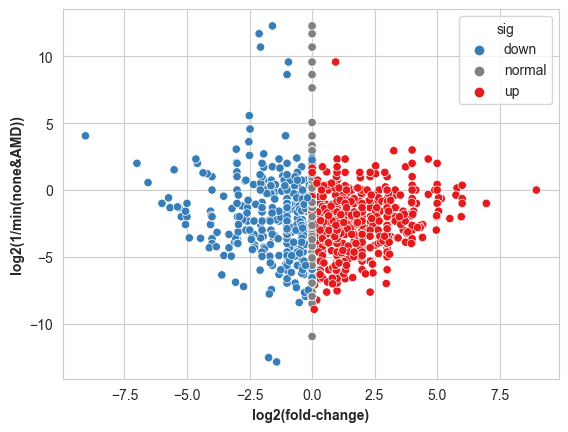

In [68]:
ALLPLOT(df,'n_terminal','none','AMD','log2(1/min(none&modification))')      #1/min(none&modification),abs(log2(1/min(none&modification))),

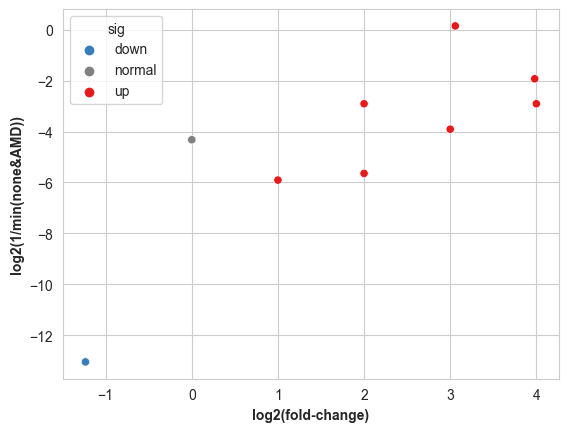

In [69]:
ALLPLOT(df,'n_terminal','ACT','AMD','log2(1/min(none&modification))')

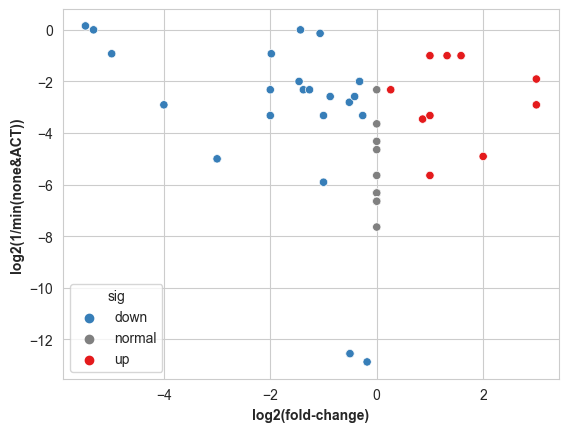

In [70]:
ALLPLOT(df,'c_terminal','none','ACT','log2(1/min(none&modification))')

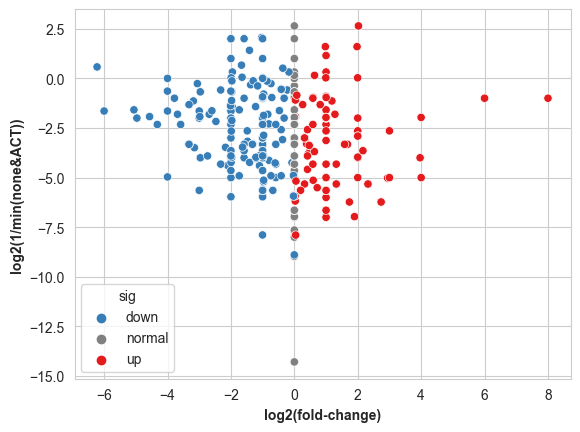

In [71]:
ALLPLOT(df,'c_terminal','AMD','ACT','log2(1/min(none&modification))')

In [72]:
# 筛选出所有的脂肪链修饰归为一类

ccdf1=df[(df['modification2'].isin(['C3', 'C4', 'C5','C6','C7','C8','C10','C11','C12','C13','C14','C15','C16','C18'])) & (df['communal-modification']=='none') & (df['stick_terminal']=='c_terminal')].copy()

ccdf2=df[(df['modification2'].isin(['C3', 'C4', 'C5','C6','C7','C8','C10','C11','C12','C13','C14','C15','C16','C18'])) & (df['communal-modification']=='AMD') & (df['stick_terminal']=='c_terminal')].copy()

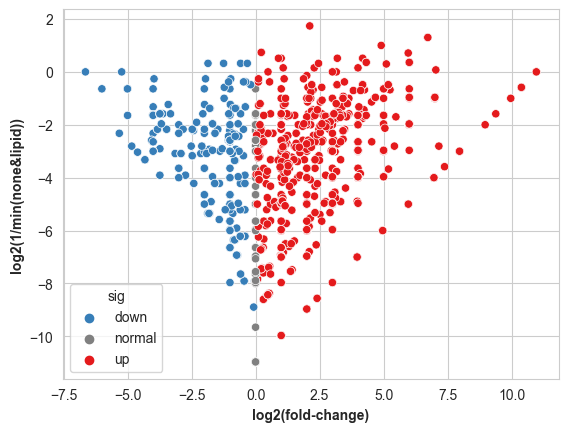

In [73]:



def LIPIDPLOT(df,stick_ter,communal_modification,y):
    # filter=df[(df['stick_terminal']==stick_ter) & (df['communal-modification']==communal_modification) & (df['modification2']==modification)]
    # tips = sns.load_dataset('tips')

    ax = sns.scatterplot(x="fold-change", y=y,
                      hue='sig',
                      hue_order = ('down','normal','up'),
                      palette=("#377EB8","grey","#E41A1C"),
                      data=df)
    ylabel=y.replace('modification','lipid')
    ax.set_ylabel(ylabel,fontweight='bold')
    new_y=y.replace('/','除')
    ax.set_xlabel('log2(fold-change)',fontweight='bold')
    titles='&'.join([stick_ter,communal_modification,'lipid',new_y])
    titles=titles+'.png'
    scatter_fig=ax.get_figure()
    scatter_fig.savefig(titles,dpi=1300)

LIPIDPLOT(ccdf2,'c_terminal','AMD','log2(1/min(none&modification))')

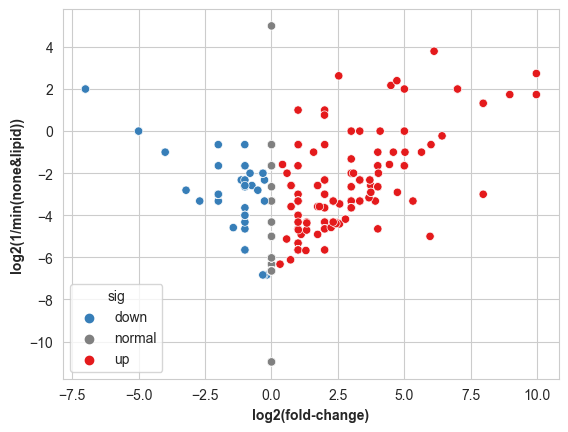

In [74]:
LIPIDPLOT(ccdf1,'c_terminal','none','log2(1/min(none&modification))')

In [75]:
# 针对脂肪链修饰绘制一个分组的火山图，就是曼哈顿图和火山图的结合，同时给明显活性上升的点标注出序列和target
# 横坐标是差值，纵坐标是fold-change，对每一类进行类推，每一类的差值在前一类的基础上加一
lipids=['C3', 'C4', 'C5','C6','C7','C8','C10','C11','C12','C13','C14','C15','C16','C18']
ccdf3=ccdf2.copy()
ccdf3['xxx']=ccdf3['log2(1/min(none&modification))'].copy()
# for i, lipid in enumerate(lipids):
#     ccdf3.loc[ccdf3['modification2']==lipid,'xxx']=i+ccdf3['xxx']
ccdf3

,sequence,target,stick_terminal,communal-modification,measure,unit,modification1,modification2,activity1,activity2,fold-change,abs(none-modification),abs(log2(subtract)),abs(log10(subtract)),1/min(none&modification),abs(log2(1/min(none&modification))),log2(1/min(none&modification)),abs(log10(1/min(none&modification))),sig,xxx
3749,KVvvKWVvKvVK,Staphylococcus aureus ATCC 6538P,c_terminal,AMD,MIC,uM,none,C16,100.0,100.0,0.000000,0.0,0.000000,0.000000,0.010000,6.643856,-6.643856,2.000000,normal,-6.643856
3750,KVvvKWVvKvVK,Bacillus subtilis ATCC 6051,c_terminal,AMD,MIC,uM,none,C16,60.0,100.0,-0.736966,40.0,5.321928,1.602060,0.016667,5.906891,-5.906891,1.778151,down,-5.906891
3751,KVvvKWVvKvVK,Pseudomonas aeruginosa ATCC 27853,c_terminal,AMD,MIC,uM,none,C16,100.0,100.0,0.000000,0.0,0.000000,0.000000,0.010000,6.643856,-6.643856,2.000000,normal,-6.643856
3752,KVvvKWVvKvVK,Acinetobacter baumannii ATCC 19606,c_terminal,AMD,MIC,uM,none,C16,100.0,100.0,0.000000,0.0,0.000000,0.000000,0.010000,6.643856,-6.643856,2.000000,normal,-6.643856
3753,KVvvKWVvKvVK,Escherichia coli ATCC 25922,c_terminal,AMD,MIC,uM,none,C16,100.0,100.0,0.000000,0.0,0.000000,0.000000,0.010000,6.643856,-6.643856,2.000000,normal,-6.643856
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5794,wrrrrrrrrG,Duck Hepatitis B Virus (DHBV),c_terminal,AMD,IC50 REP,uM,none,C12,1.3,0.7,0.893085,0.6,0.736966,0.221849,1.428571,0.514573,0.514573,0.154902,up,0.514573
5795,wrrrrrrrrG,Duck Hepatitis B Virus (DHBV),c_terminal,AMD,IC50 REP,uM,none,C14,1.3,1.2,0.115477,0.1,3.321928,1.000000,0.833333,0.263034,-0.263034,0.079181,up,-0.263034
5796,wrrrrrrrrG,Duck Hepatitis B Virus (DHBV),c_terminal,AMD,IC50 REP,uM,none,C16,1.3,1.7,-0.387023,0.4,1.321928,0.397940,0.769231,0.378512,-0.378512,0.113943,down,-0.378512
5797,wrrrrrrrrG,Duck Hepatitis B Virus (DHBV),c_terminal,AMD,IC50 REP,uM,none,C18,1.3,1.8,-0.469485,0.5,1.000000,0.301030,0.769231,0.378512,-0.378512,0.113943,down,-0.378512


In [76]:
# ccdf3
index=0
maxslist=[]
maxs=0
for i, lipid in enumerate(lipids):
    mdf=ccdf3[(ccdf3['modification2']==lipid)]
    # print(mdf)
    if index==0:
        maxs=max(list(mdf['log2(1/min(none&modification))']))
        # print(maxs)
        # break
        maxslist.append(maxs)
        index+=1
    else:
        maxs+=(max(list(mdf['log2(1/min(none&modification))']))-min(list(mdf['log2(1/min(none&modification))'])))
        maxslist.append(maxs)
        # print(maxslist)
        # break
        ccdf3.loc[ccdf3['modification2']==lipid,'xxx']=ccdf3['xxx']+maxslist[index-1]
        # ccdf3.loc[ccdf3['modification2']==lipid,'xxx']=ccdf3['xxx']+maxs
        index+=1

In [77]:
ccdf3
# maxslist

,sequence,target,stick_terminal,communal-modification,measure,unit,modification1,modification2,activity1,activity2,fold-change,abs(none-modification),abs(log2(subtract)),abs(log10(subtract)),1/min(none&modification),abs(log2(1/min(none&modification))),log2(1/min(none&modification)),abs(log10(1/min(none&modification))),sig,xxx
3749,KVvvKWVvKvVK,Staphylococcus aureus ATCC 6538P,c_terminal,AMD,MIC,uM,none,C16,100.0,100.0,0.000000,0.0,0.000000,0.000000,0.010000,6.643856,-6.643856,2.000000,normal,87.049952
3750,KVvvKWVvKvVK,Bacillus subtilis ATCC 6051,c_terminal,AMD,MIC,uM,none,C16,60.0,100.0,-0.736966,40.0,5.321928,1.602060,0.016667,5.906891,-5.906891,1.778151,down,87.786917
3751,KVvvKWVvKvVK,Pseudomonas aeruginosa ATCC 27853,c_terminal,AMD,MIC,uM,none,C16,100.0,100.0,0.000000,0.0,0.000000,0.000000,0.010000,6.643856,-6.643856,2.000000,normal,87.049952
3752,KVvvKWVvKvVK,Acinetobacter baumannii ATCC 19606,c_terminal,AMD,MIC,uM,none,C16,100.0,100.0,0.000000,0.0,0.000000,0.000000,0.010000,6.643856,-6.643856,2.000000,normal,87.049952
3753,KVvvKWVvKvVK,Escherichia coli ATCC 25922,c_terminal,AMD,MIC,uM,none,C16,100.0,100.0,0.000000,0.0,0.000000,0.000000,0.010000,6.643856,-6.643856,2.000000,normal,87.049952
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5794,wrrrrrrrrG,Duck Hepatitis B Virus (DHBV),c_terminal,AMD,IC50 REP,uM,none,C12,1.3,0.7,0.893085,0.6,0.736966,0.221849,1.428571,0.514573,0.514573,0.154902,up,63.966380
5795,wrrrrrrrrG,Duck Hepatitis B Virus (DHBV),c_terminal,AMD,IC50 REP,uM,none,C14,1.3,1.2,0.115477,0.1,3.321928,1.000000,0.833333,0.263034,-0.263034,0.079181,up,77.950416
5796,wrrrrrrrrG,Duck Hepatitis B Virus (DHBV),c_terminal,AMD,IC50 REP,uM,none,C16,1.3,1.7,-0.387023,0.4,1.321928,0.397940,0.769231,0.378512,-0.378512,0.113943,down,93.315296
5797,wrrrrrrrrG,Duck Hepatitis B Virus (DHBV),c_terminal,AMD,IC50 REP,uM,none,C18,1.3,1.8,-0.469485,0.5,1.000000,0.301030,0.769231,0.378512,-0.378512,0.113943,down,102.988610


In [78]:
# 创建一个获取所有最大横坐标的列表
get_maxlist=[]
for i, lipid in enumerate(lipids):
    mdf=ccdf3[(ccdf3['modification2']==lipid)]
    get_maxlist.append(max(list(mdf['xxx'])))

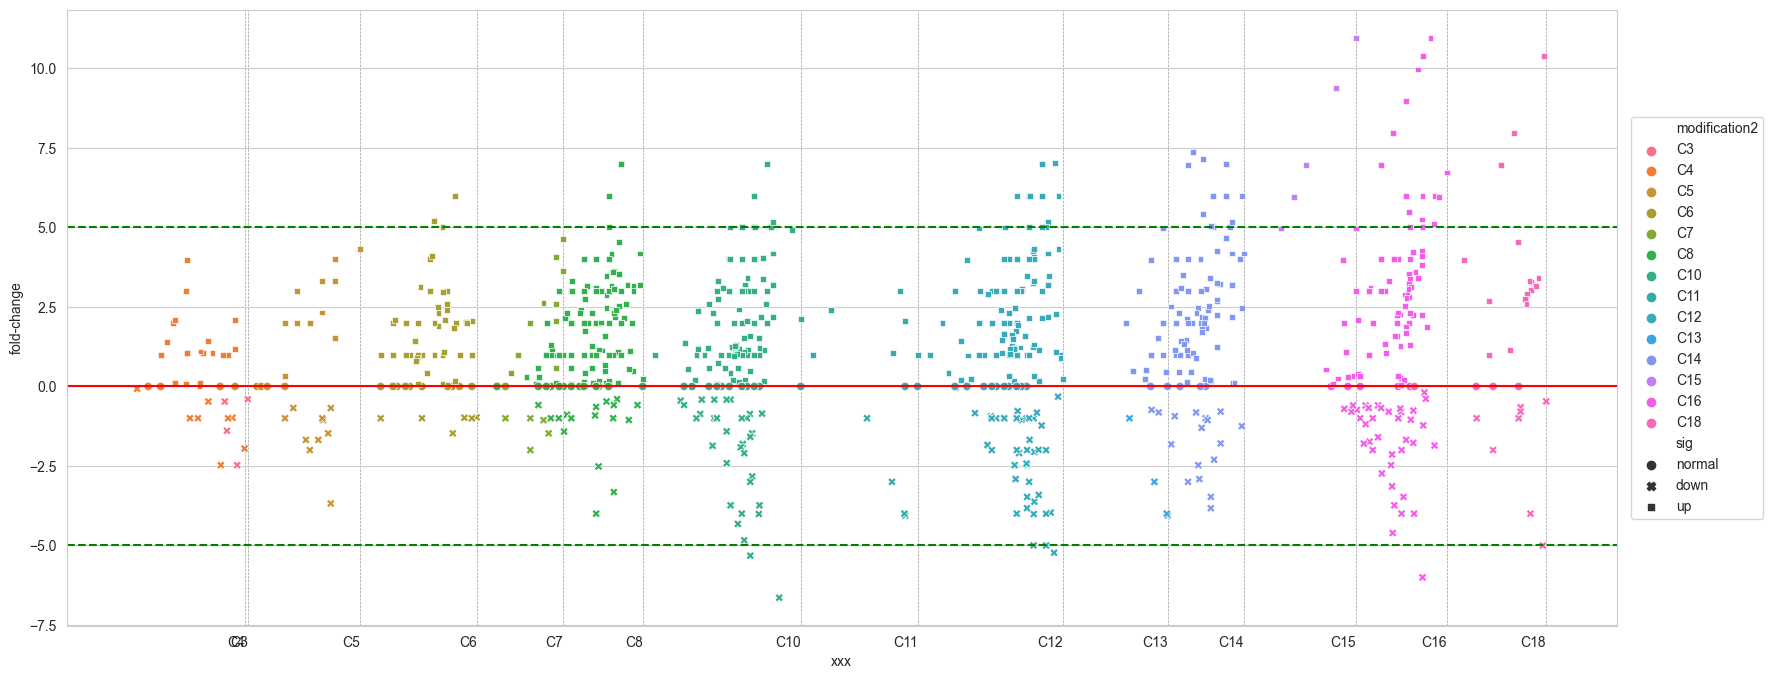

In [79]:

plt.figure(figsize=(20, 8))
plt.grid(axis='x',color='grey', linestyle='--', linewidth=0.5, alpha=0.8)
ax = sns.scatterplot(x="xxx", y="fold-change",
                  hue='modification2',
                  style='sig',
                  # hue_order = ('down','normal','up'),
                     hue_order=(lipids),
                  # palette=("#377EB8","grey","#E41A1C"),
                  #    palette=(colors),
                  data=ccdf3)
# ax.get_xticks()
plt.legend(bbox_to_anchor=(1.005, 0.5), loc='center left')
plt.xticks(get_maxlist,lipids,fontsize=10,ha='right')
plt.axhline(y=0, color='r', linestyle='-')
plt.axhline(y=-5, color='g', linestyle='--')
plt.axhline(y=5, color='g', linestyle='--')

# ups=ccdf3[(ccdf3['fold-change']>5)].copy()
# ups=ups[ups['abs(log10(subtract))']>3]
# for index,row in ups.iterrows():
#     texts='&'.join([row['sequence'],row['target']])
#     x=row['xxx']
#     y=row['fold-change']
#     ax.annotate(texts,xy=(x,y),xytext=(x+0.1,y+0.1),color='red',fontsize=5)
#
# downs=ccdf3[(ccdf3['fold-change']<-4)].copy()
# downs=downs[downs['abs(log10(subtract))']>2]
# for index,row in downs.iterrows():
#     texts='&'.join([row['sequence'],row['target']])
#     x=row['xxx']
#     y=row['fold-change']
#     ax.annotate(texts,xy=(x,y),xytext=(x+0.1,y+0.1),color='blue',fontsize=5)

plt.savefig('lipid-分组.png',dpi=1300)
# ax.set_ylabel('abs(none-lipid)',fontweight='bold')
# ax.set_xlabel('FoldChange',fontweight='bold')
# titles='&'.join([stick_ter,communal_modification,'lipid'])
# titles=titles+'.png'
# scatter_fig=ax.get_figure()
# scatter_fig.savefig(titles,dpi=1300)

In [43]:
# len(maxslist)
print(maxslist)
print(lipids)

[-1.3219280948873622, 7.57061472176119, 17.22345969476317, 25.189243979425257, 30.83310016919998, 41.798884453862065, 52.76466873852415, 63.730453023186236, 74.69623730784832, 80.34009349762304, 89.30587778228514, 95.30587778228514, 103.67874284239772, 114.64452712705982]
['C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C10', 'C11', 'C12', 'C13', 'C14', 'C15', 'C16', 'C18']
